Homework 1: Data Analysis Basics
Problem
Obtain the CSV (comma separated variable) file containing the counts of bicycles crossing the Fremont Bridge since 2012 (as described in https://data.seattle.gov/browse?category=Transportation&limitTo=datasets&utf8=%E2%9C%93). Create a project directory with subdirectories for data and analysis, and create a README file. Download the data from https://data.seattle.gov/resource/4xy5-26gy.csv put it in the data directory. Create an iPython Notebook to analyze these data. In the notebook: (1) Select the 2015 data, creating a new dataframe with fields for date, hour, and count, and use these data in questions (2)-(4); (2) use python matplotlib to plot the counts by hour;  (3) compute the hourly average counts; and (4) determine what is the busiest hour of the day. 

In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('../data/4xy5-26gy.csv')

In [3]:
data.head()

,date,fremont_bridge_nb,fremont_bridge_sb
0,2012-10-03T02:00:00.000,1,1
1,2012-10-05T01:00:00.000,4,4
2,2012-10-05T03:00:00.000,2,2
3,2012-10-05T23:00:00.000,16,16
4,2012-10-07T22:00:00.000,9,9


In [4]:
times = pd.DatetimeIndex(data['date'])

In [5]:
data2015=data[times.year==2015].copy()

In [6]:
times2015=pd.DatetimeIndex(data2015['date'])

In [7]:
times2015

DatetimeIndex(['2015-07-30 05:00:00', '2015-07-11 20:00:00',
               '2015-07-31 19:00:00', '2015-07-14 08:00:00',
               '2015-07-17 20:00:00', '2015-07-31 05:00:00',
               '2015-07-31 09:00:00', '2015-07-05 07:00:00',
               '2015-07-06 12:00:00', '2015-07-21 18:00:00',
               ...
               '2015-08-09 09:00:00', '2015-08-09 05:00:00',
               '2015-08-16 13:00:00', '2015-08-03 07:00:00',
               '2015-08-08 05:00:00', '2015-08-14 16:00:00',
               '2015-08-05 06:00:00', '2015-08-05 14:00:00',
               '2015-08-15 06:00:00', '2015-08-16 12:00:00'],
              dtype='datetime64[ns]', length=893, freq=None)

In [8]:
data2015['date']=times2015.date

In [9]:
data2015['hour']=times2015.hour

In [10]:
data2015['count']=data2015['fremont_bridge_nb']+data2015['fremont_bridge_sb']

In [11]:
data2015.head()

,date,fremont_bridge_nb,fremont_bridge_sb,hour,count
37,2015-07-30,20,22,5,42
38,2015-07-11,29,36,20,65
39,2015-07-31,88,103,19,191
40,2015-07-14,448,190,8,638
41,2015-07-17,32,66,20,98


In [12]:
%matplotlib inline

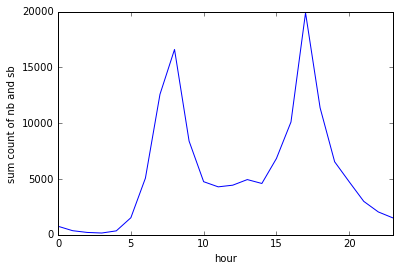

In [13]:
plot = data2015.groupby(['hour'])['count'].sum().plot()
plot.set_ylabel('sum count of nb and sb')

In [14]:
hourlyAvrCount=data2015.groupby(['hour'])['count'].mean()

In [15]:
hourlyAvrCount

hour
0      20.648649
1      10.514286
2       6.838710
3       5.000000
4       9.805556
5      35.534884
6     130.179487
7     322.743590
8     425.794872
9     226.945946
10    125.236842
11    110.179487
12    117.000000
13    123.700000
14    127.750000
15    162.761905
16    288.828571
17    510.102564
18    334.823529
19    186.942857
20    125.000000
21     80.972973
22     62.060606
23     36.975610
Name: count, dtype: float64

In [16]:
hourlyAvrCount.argmax()

17

Thus the busist hour in the day is 17:00-18:00.

In [17]:
data2015.to_csv('data2015.csv')

In [18]:
!cat data2015.csv

,date,fremont_bridge_nb,fremont_bridge_sb,hour,count
37,2015-07-30,20,22,5,42
38,2015-07-11,29,36,20,65
39,2015-07-31,88,103,19,191
40,2015-07-14,448,190,8,638
41,2015-07-17,32,66,20,98
42,2015-07-31,25,16,5,41
43,2015-07-31,166,93,9,259
44,2015-07-05,44,26,7,70
45,2015-07-06,49,57,12,106
46,2015-07-21,168,302,18,470
49,2015-07-05,15,16,22,31
50,2015-07-15,44,53,13,97
51,2015-07-06,118,163,16,281
52,2015-07-22,383,210,8,593
53,2015-07-01,33,19,5,52
54,2015-07-11,2,6,3,8
55,2015-07-04,77,65,10,142
56,2015-07-12,97,72,13,169
57,2015-07-15,149,206,16,355
58,2015-07-07,403,204,8,607
59,2015-07-03,68,72,18,140
60,2015-07-16,41,50,12,91
61,2015-07-26,55,49,10,104
62,2015-07-06,5,2,2,7
63,2015-07-31,11,13,0,24
64,2015-07-28,122,232,16,354
65,2015-07-15,397,220,8,617
66,2015-07-30,43,39,12,82
67,2015-07-16,26,13,5,39
68,2015-07-15,147,53,6,200
69,2015-07-12,8,9,1,17
70,2015-07-04,83,82,15,165
72,2015-07-29,8,2,4,10
73,2015-07-03,79,67,17,146
74,2015-07-23,6,7,4,13
75,2015-07-17,47,46,11,93
76,